https://www.kaggle.com/pranavraikokte/covid19-image-dataset

### Context
Helping Deep Learning and AI Enthusiasts like me to contribute to improving COVID-19 detection using just Chest X-rays.

### Content
It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.

### Acknowledgements
The University of Montreal for releasing the images.

### Inspiration
Help the medical and researcher community by sharing my work and encourage them to contribute extensively.

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.metrics import AUC


### Data Pre-processing

The data is already split into training and test sets. There are three classes (Normal, Viral Pneumonia and Covid-19). The classes in dataset are balanced (equal number of each class) 

In [2]:
# Since the dataset is relatively small we'll use ImageDataGenerator to augment our training data

training_data_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05)

BATCH_SIZE = 16

training_iterator = training_data_generator.flow_from_directory('Covid19-dataset/train',class_mode='categorical',color_mode='grayscale',batch_size=BATCH_SIZE)


Found 251 images belonging to 3 classes.


In [3]:
# For test data we'll use ImageDataGenerator just to load the data and rescale it

validation_data_generator = ImageDataGenerator(
        rescale=1./255)

BATCH_SIZE = 16

validation_iterator = training_data_generator.flow_from_directory('Covid19-dataset/test',class_mode='categorical',color_mode='grayscale',batch_size=BATCH_SIZE)


Found 66 images belonging to 3 classes.


### Building a model

In [69]:
# To begin with we'll use this simple model

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

model.add(Conv2D(2, 5, strides=3, activation="relu")) 
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5,5)))

model.add(Flatten())

model.add(Dense(3,activation="softmax"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 84, 84, 2)         52        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 2)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 1539      
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss= CategoricalCrossentropy(), 
    metrics=[CategoricalAccuracy(), AUC()]
        )

In [72]:
history = model.fit(training_iterator,
        steps_per_epoch=training_iterator.samples / BATCH_SIZE,
        epochs=20,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples / BATCH_SIZE)

Epoch 1/20
15/15 [==============================] - 3s 198ms/step - loss: 1.0752 - categorical_accuracy: 0.4422 - auc_9: 0.6242 - val_loss: 1.0360 - val_categorical_accuracy: 0.5152 - val_auc_9: 0.7212
Epoch 2/20
15/15 [==============================] - 2s 151ms/step - loss: 0.9667 - categorical_accuracy: 0.5976 - auc_9: 0.7825 - val_loss: 0.8152 - val_categorical_accuracy: 0.7879 - val_auc_9: 0.8673
Epoch 3/20
15/15 [==============================] - 2s 143ms/step - loss: 0.6840 - categorical_accuracy: 0.7331 - auc_9: 0.8911 - val_loss: 0.6955 - val_categorical_accuracy: 0.7424 - val_auc_9: 0.8823
Epoch 4/20
15/15 [==============================] - 2s 159ms/step - loss: 0.4940 - categorical_accuracy: 0.8247 - auc_9: 0.9372 - val_loss: 0.9278 - val_categorical_accuracy: 0.6212 - val_auc_9: 0.8199
Epoch 5/20
15/15 [==============================] - 2s 148ms/step - loss: 0.4938 - categorical_accuracy: 0.8008 - auc_9: 0.9321 - val_loss: 0.7335 - val_categorical_accuracy: 0.6667 - val_auc_

The model produced the following results:  
val_categorical_accuracy: 0.8182  
val_auc_9: 0.9459

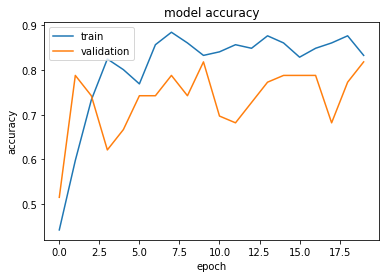

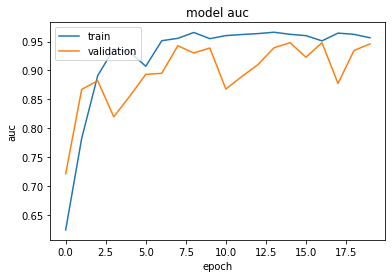

In [75]:
# plotting categorical and validation accuracy over epochs

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# plotting auc and validation auc over epochs

plt.plot(history.history['auc_9'])
plt.plot(history.history['val_auc_9'])
plt.title('model auc')
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Adjusting the model 

In [76]:
# To improve the model we'll add additional Conv2D and MaxPooling2D layers

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

model.add(Conv2D(2, 5, strides=3, activation="relu")) 
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5,5)))
model.add(Conv2D(4, 3, strides=1, activation="relu")) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())

model.add(Dense(3,activation="softmax"))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 84, 84, 2)         52        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 2)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 4)         76        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 4)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 591       
Total params: 719
Trainable params: 719
Non-trainable params: 0
_______________________________________________________

In [77]:
# We'll also try lower learning rate and will increase the number of epochs in the next step
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss= CategoricalCrossentropy(), 
    metrics=[CategoricalAccuracy(), AUC()]
        )

In [78]:
# We'll run 40 epochs this time
history = model.fit(training_iterator,
        steps_per_epoch=training_iterator.samples / BATCH_SIZE,
        epochs=40,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples / BATCH_SIZE)

Epoch 1/40
15/15 [==============================] - 6s 225ms/step - loss: 1.1013 - categorical_accuracy: 0.4416 - auc_10: 0.5333 - val_loss: 1.0820 - val_categorical_accuracy: 0.3939 - val_auc_10: 0.6038
Epoch 2/40
15/15 [==============================] - 2s 146ms/step - loss: 1.0640 - categorical_accuracy: 0.4451 - auc_10: 0.6174 - val_loss: 0.9871 - val_categorical_accuracy: 0.6212 - val_auc_10: 0.8398
Epoch 3/40
15/15 [==============================] - 2s 148ms/step - loss: 0.9095 - categorical_accuracy: 0.6676 - auc_10: 0.8477 - val_loss: 0.6890 - val_categorical_accuracy: 0.7879 - val_auc_10: 0.8907
Epoch 4/40
15/15 [==============================] - 2s 155ms/step - loss: 0.5658 - categorical_accuracy: 0.8174 - auc_10: 0.9223 - val_loss: 0.6800 - val_categorical_accuracy: 0.7424 - val_auc_10: 0.8693
Epoch 5/40
15/15 [==============================] - 2s 155ms/step - loss: 0.5468 - categorical_accuracy: 0.8003 - auc_10: 0.9201 - val_loss: 0.4991 - val_categorical_accuracy: 0.7879 -

The results are:  
val_categorical_accuracy: 0.8788  
val_auc_10: 0.9710  

Which are better than on the first model

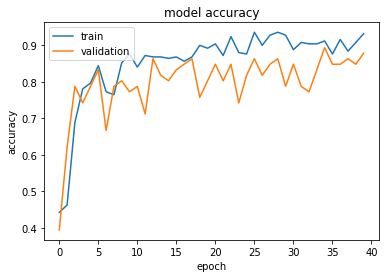

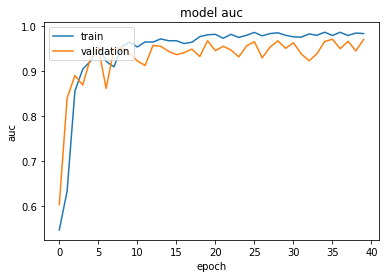

In [79]:
# plotting categorical and validation accuracy over epochs
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# plotting auc and validation auc over epochs
plt.plot(history.history['auc_10'])
plt.plot(history.history['val_auc_10'])
plt.title('model auc')
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [80]:
# Additionally let's make a Classification Report and a Confusion Matrix to further illistrate our results 

test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)

predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)

test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)

predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = validation_iterator.classes

class_labels = list(validation_iterator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)   
 
    
    
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

              precision    recall  f1-score   support

       Covid       0.54      0.50      0.52        26
      Normal       0.32      0.35      0.33        20
   Pneumonia       0.40      0.40      0.40        20

    accuracy                           0.42        66
   macro avg       0.42      0.42      0.42        66
weighted avg       0.43      0.42      0.43        66

[[13  6  7]
 [ 8  7  5]
 [ 3  9  8]]
